In [6]:
import pandas as pd
import numpy as np
from feature_selector import FeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
features = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/'+ 'One_year_features' + '.csv')
targets = pd.read_csv('/Users/t.wang/Desktop/Dissertation/Python/WT-result/'+ 'One_year_target' + '.csv')

# Wrapper methods comparison - mlxtend

In [8]:
# As previous plots indicate, score is not improved after 15 features
feature_num = 16
rf_r = RandomForestRegressor(n_estimators=100, random_state=42)

start = time.time()
sfs = SFS(rf_r, 
          k_features=feature_num, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(features, targets)
print('\nSequential Forward Selection (k=16):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)
end = time.time()
elapsed = end - start 
print('Time for SFS:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))



start = time.time()
sbs = SFS(rf_r, 
          k_features=feature_num, 
          forward=False, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(features, targets)
print('\nSequential Backward Selection (k=16):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)
end = time.time()
elapsed = end - start 
print('Time for SBS:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))



start = time.time()
sffs = SFS(rf_r, 
          k_features=feature_num, 
          forward=True, 
          floating=True, 
          scoring='neg_mean_squared_error',
          cv=4,
          n_jobs=-1)
sffs = sffs.fit(features, targets)
print('\nSequential Forward Floating Selection (k=16):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)
end = time.time()
elapsed = end - start 
print('Time for SFFS:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))



start = time.time()
sbfs = SFS(rf_r, 
          k_features=feature_num, 
          forward=False, 
          floating=True, 
          scoring='neg_mean_squared_error',
          cv=4,
          n_jobs=-1)
sbfs = sbfs.fit(features, targets)
print('\nSequential Backward Floating Selection (k=16):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)
end = time.time()
elapsed = end - start 
print('Time for SBFS:'+ time.strftime("%H:%M:%S", time.gmtime(elapsed)))


Sequential Forward Selection (k=16):
(2, 6, 8, 11, 53, 64, 66, 68, 75, 83, 95, 96, 102, 113, 116, 126)
CV Score:
-672.4211560709999
Time for SFS:01:05:16

Sequential Backward Selection (k=16):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 127)
CV Score:
-679.7501275908602
Time for SBS:14:56:00



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...
STOPPING EARLY DUE TO KEYBOARD INTERRUPT...


Sequential Forward Floating Selection (k=16):
(2, 6, 8, 96)
CV Score:
-683.6184106627907
Time for SFFS:00:05:32


KeyboardInterrupt: 

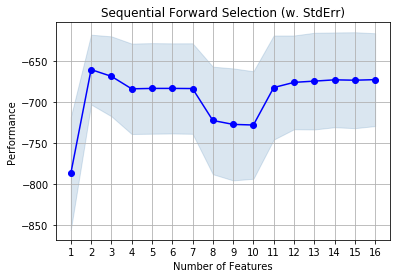

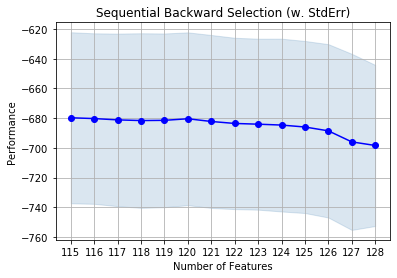

In [14]:
# Plotting the results
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()


# Plotting the results
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')

plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

In [21]:
X_Percentile_sfs = sfs1.transform(X_Percentile)
X_Percentile_sfs.shape

(6576, 25)